In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings("ignore")
pd.options.display.max_columns=1000
pd.options.display.max_rows=10000
pd.options.display.max_colwidth=-1

In [2]:
data=pd.read_csv("Country.csv")
df=data.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [6]:
df.isnull().any().sum()

0

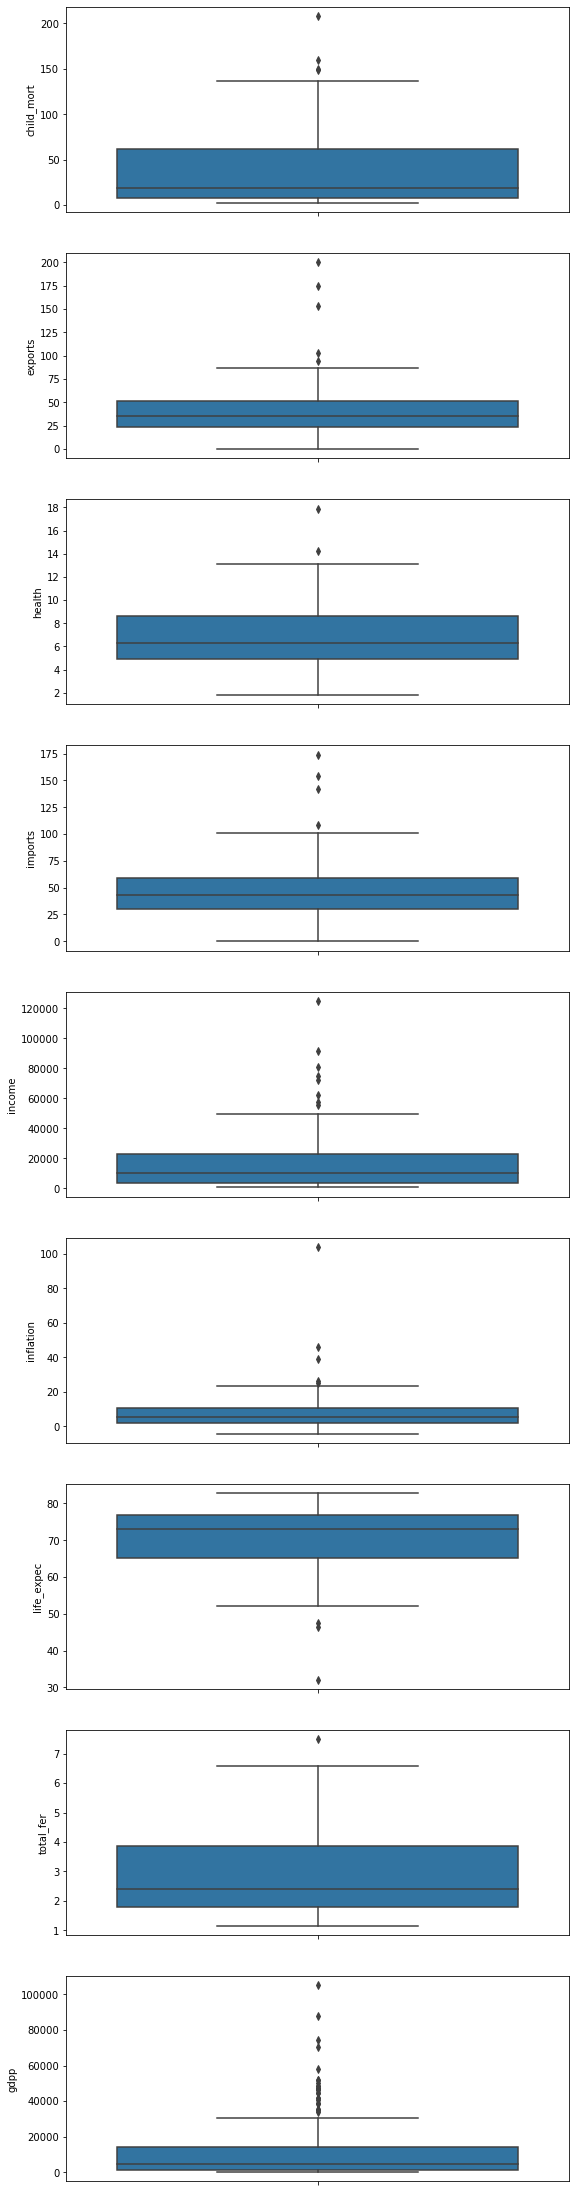

In [7]:
columns_name=df.drop("country",axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name),figsize=(9,40))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i],data=df)

In [8]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])
    IQR=Q3-Q1
    low=Q1-(1.5*IQR)
    up=Q3+1.5*IQR
    return low,up
for col in df.drop("country",axis=1).columns:
    lower,upper=outlier(df[col])
    df[col]=np.clip(df[col],a_min=lower,a_max=upper)

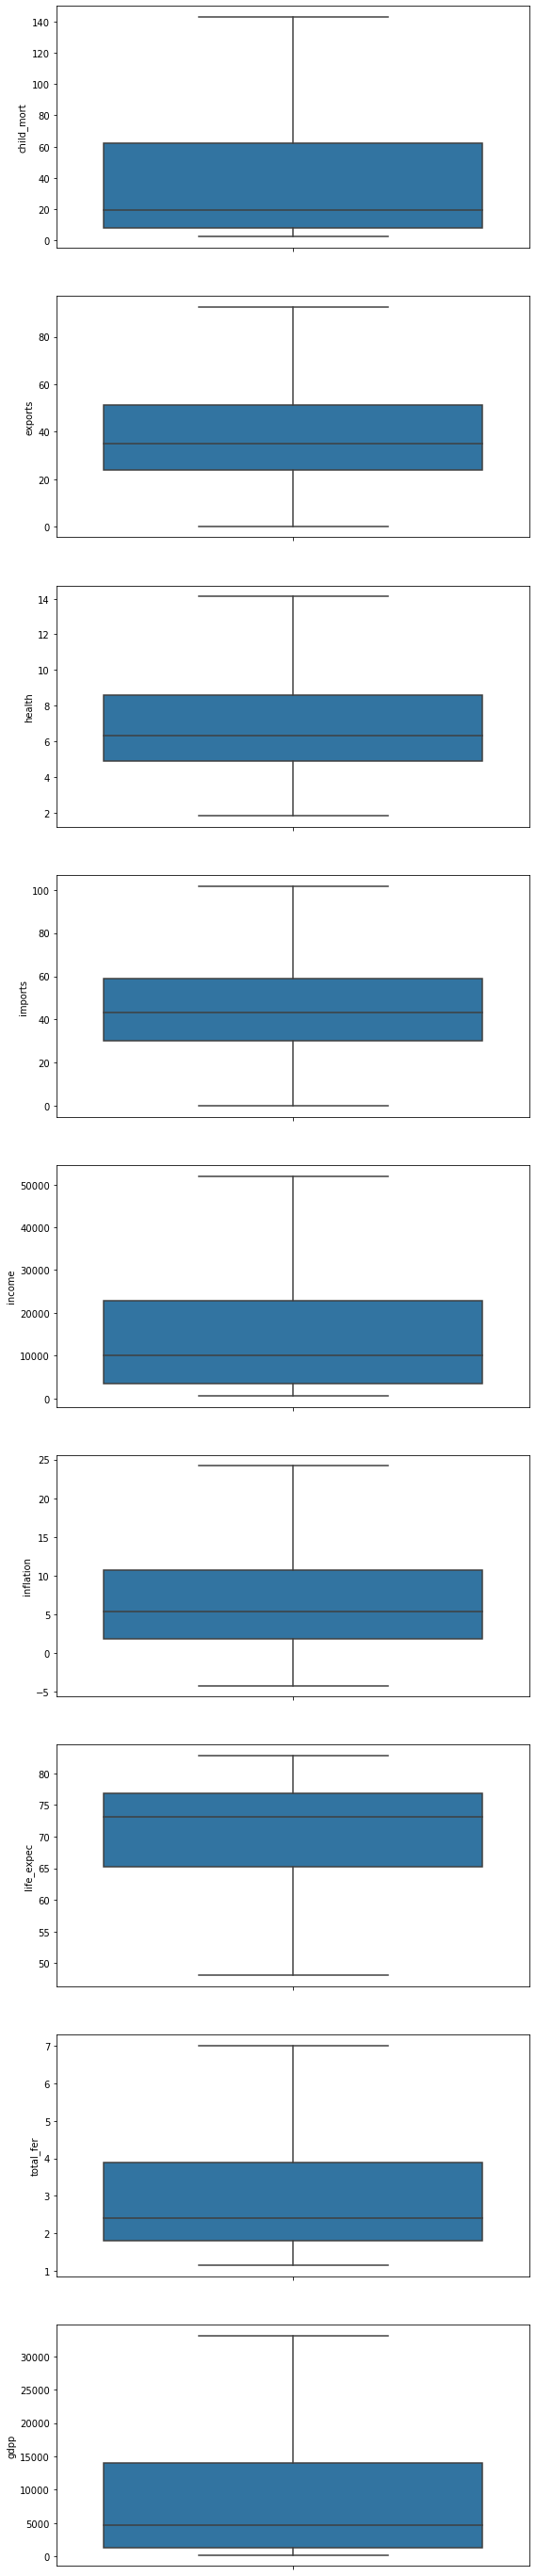

In [9]:
columns_name=df.drop("country",axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name),figsize=(9,50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i],y=columns_name[i],data=df)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.698204,38.443293,2.6000,8.250,19.30,62.10,142.8750
exports,167.0,39.543557,21.301318,0.1090,23.800,35.00,51.35,92.6750
health,167.0,6.792575,2.668103,1.8100,4.920,6.32,8.60,14.1200
imports,167.0,45.862071,20.338815,0.0659,30.200,43.30,58.75,101.5750
income,167.0,15921.574850,15207.197459,609.0000,3355.000,9960.00,22800.00,51967.5000
inflation,167.0,7.065066,6.704968,-4.2100,1.810,5.39,10.75,24.1600
life_expec,167.0,70.663772,8.522535,48.0500,65.300,73.10,76.80,82.8000
total_fer,167.0,2.945075,1.505564,1.1500,1.795,2.41,3.88,7.0075
gdpp,167.0,10351.281437,11612.044330,231.0000,1330.000,4660.00,14050.00,33130.0000


<AxesSubplot:>

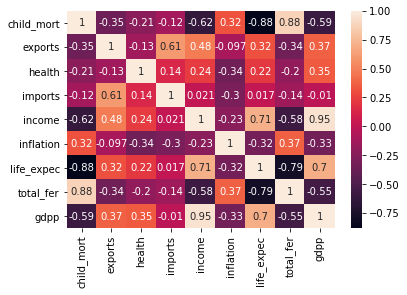

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df_country=df["country"]

In [13]:
df.set_index("country",inplace=True)

In [14]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553
Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090
Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460
Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530
Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200
Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300
Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220
Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130
Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130


In [15]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(df)
df_scaled=rc.transform(df)
df_scaled

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [16]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
df_scaled_pca=pca.fit_transform(df_scaled)
df_scaled_pca

array([[-2.35599001, -0.37005504],
       [ 0.14671397, -0.11321079],
       [-0.38546281, -0.28423578],
       [-2.31319715,  0.84034394],
       [ 0.87898283,  0.42385543],
       [-0.03683209, -1.49175073],
       [-0.32091104, -0.21533087],
       [ 2.230989  , -1.72953507],
       [ 2.76496725, -0.45864778],
       [-0.20169606, -0.19021746],
       [ 1.48484352, -0.50347604],
       [ 1.68101384,  0.56159607],
       [-1.07500622, -0.73038078],
       [ 0.99924594, -0.09543189],
       [ 0.22558541,  0.75926061],
       [ 2.8902538 ,  0.79801972],
       [ 0.05323451,  0.97629377],
       [-2.05954631, -0.01201804],
       [-0.35993173,  0.92309428],
       [-0.77574909,  0.02615376],
       [ 0.59225569, -0.24258019],
       [-0.70923692,  0.35544659],
       [ 0.15686462, -1.68448034],
       [ 2.09932628, -0.27393831],
       [ 0.64390913,  0.48305449],
       [-2.42518368, -0.45430947],
       [-2.35906241, -0.78334508],
       [-0.65345645,  1.0351861 ],
       [-2.13716277,

In [17]:
from sklearn.cluster import KMeans
km_model=KMeans(n_clusters=3,random_state=42).fit(df_scaled_pca)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [18]:
km_model.cluster_centers_

array([[ 0.13210913,  0.25673052],
       [-1.83282542, -0.15602411],
       [ 2.35046875, -0.31078303]])

In [19]:
km_model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1])

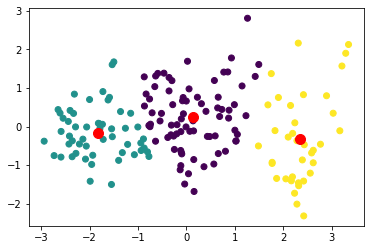

In [20]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=km_model.labels_)
centers=km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="r",s=100)

In [21]:
df_kmeans=df.copy()
df_kmeans["Developed_Status"]=km_model.labels_
df_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_Status
country,,,,,,,,,,
Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,1
Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,0
Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,0
Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,1
Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,0
Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,0
Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,0
Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,2
Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,2


In [22]:
df_kmeans.reset_index(inplace=True)

In [23]:
df_kmeans.groupby("Developed_Status")[["country"]].sum()

,country
Developed_Status,
0,"AlbaniaAlgeriaAntigua and BarbudaArgentinaArmeniaAzerbaijanBarbadosBelarusBelizeBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBulgariaCambodiaCape VerdeChileChinaColombiaCosta RicaCroatiaDominican RepublicEcuadorEl SalvadorEquatorial GuineaEstoniaFijiGeorgiaGrenadaGuatemalaGuyanaHungaryIranJamaicaJordanKazakhstanKyrgyz RepublicLatviaLebanonLibyaLithuaniaMacedonia, FYRMalaysiaMaldivesMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoNamibiaOmanPanamaParaguayPeruPhilippinesPolandRomaniaRussiaSamoaSaudi ArabiaSerbiaSeychellesSolomon IslandsSt. Vincent and the GrenadinesSurinameThailandTongaTunisiaTurkeyTurkmenistanUkraineUruguayVanuatuVenezuelaVietnam"
1,"AfghanistanAngolaBangladeshBeninBurkina FasoBurundiCameroonCentral African RepublicChadComorosCongo, Dem. Rep.Congo, Rep.Cote d'IvoireEgyptEritreaGabonGambiaGhanaGuineaGuinea-BissauHaitiIndiaIndonesiaIraqKenyaKiribatiLaoLesothoLiberiaMadagascarMalawiMaliMauritaniaMozambiqueMyanmarNepalNigerNigeriaPakistanRwandaSenegalSierra LeoneSouth AfricaSri LankaSudanTajikistanTanzaniaTimor-LesteTogoUgandaUzbekistanYemenZambia"
2,AustraliaAustriaBahamasBahrainBelgiumBruneiCanadaCyprusCzech RepublicDenmarkFinlandFranceGermanyGreeceIcelandIrelandIsraelItalyJapanKuwaitLuxembourgMaltaNetherlandsNew ZealandNorwayPortugalQatarSingaporeSlovak RepublicSloveniaSouth KoreaSpainSwedenSwitzerlandUnited Arab EmiratesUnited KingdomUnited States


In [24]:
df_kmeans.groupby(["Developed_Status","country"]).agg({"country":"size"})

country
Developed_Status country                                
0                Albania                         1      
                 Algeria                         1      
                 Antigua and Barbuda             1      
                 Argentina                       1      
                 Armenia                         1      
                 Azerbaijan                      1      
                 Barbados                        1      
                 Belarus                         1      
                 Belize                          1      
                 Bhutan                          1      
                 Bolivia                         1      
                 Bosnia and Herzegovina          1      
                 Botswana                        1      
                 Brazil                          1      
                 Bulgaria                        1      
                 Cambodia                        1      
                 Cape Verde                      1      
                 Chile                           1      
                 China                           1      
                 Colombia                        1      
                 Costa Rica                      1      
                 Croatia                         1      
                 Dominican Republic              1      
                 Ecuador                         1      
                 El Salvador                     1      
                 Equatorial Guinea               1      
                 Estonia                         1      
                 Fiji                            1      
                 Georgia                         1      
                 Grenada                         1      
                 Guatemala                       1      
                 Guyana                          1      
                 Hungary                         1      
                 Iran                            1      
                 Jamaica                         1      
                 Jordan                          1      
                 Kazakhstan                      1      
                 Kyrgyz Republic                 1      
                 Latvia                          1      
                 Lebanon                         1      
                 Libya                           1      
                 Lithuania                       1      
                 Macedonia, FYR                  1      
                 Malaysia                        1      
                 Maldives                        1      
                 Mauritius                       1      
                 Micronesia, Fed. Sts.           1      
                 Moldova                         1      
                 Mongolia                        1      
                 Montenegro                      1      
                 Morocco                         1      
                 Namibia                         1      
                 Oman                            1      
                 Panama                          1      
                 Paraguay                        1      
                 Peru                            1      
                 Philippines                     1      
                 Poland                          1      
                 Romania                         1      
                 Russia                          1      
                 Samoa                           1      
                 Saudi Arabia                    1      
                 Serbia                          1      
                 Seychelles                      1      
                 Solomon Islands                 1      
                 St. Vincent and the Grenadines  1      
                 Suriname                        1      
                 Thailand                        1      
                 Tonga                           1      
  

In [29]:
replace_values={0:"Developing",1:"Under_developing",2:"Developed"}
final_df_kmeans=df_kmeans.replace({"Developed_Status":replace_values})
final_df_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_Status
0,Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,Under_developing
1,Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,Developing
2,Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,Developing
3,Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,Under_developing
4,Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,Developing
5,Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,Developing
6,Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,Developing
7,Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,Developed
8,Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,Developed
9,Azerbaijan,39.200,54.300,5.88,20.7000,16000.0,13.800,69.10,1.9200,5840,Developing


In [31]:
print("Developing")
final_df_kmeans.loc[:,["country"]][final_df_kmeans.Developed_Status=="Developing"]

Developing


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
9,Azerbaijan
13,Barbados
14,Belarus
16,Belize
18,Bhutan


In [33]:
final_df_kmeans.Developed_Status.value_counts()

Developing          77
Under_developing    53
Developed           37
Name: Developed_Status, dtype: int64

In [35]:
from sklearn.cluster import AgglomerativeClustering as AC
hierachical_model=AC(n_clusters=3,affinity="euclidean",linkage='ward')
label_pred_hierachical=hierachical_model.fit_predict(df_scaled_pca)

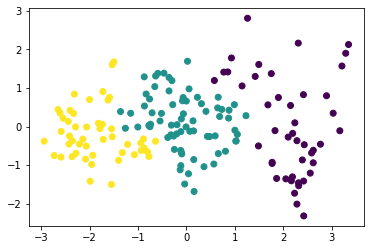

In [38]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=label_pred_hierachical,cmap='viridis')

In [39]:
df_hierachical=df.copy()
df_hierachical["Developed_Status"]=label_pred_hierachical
df_hierachical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_Status
country,,,,,,,,,,
Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,2
Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,1
Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,1
Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,2
Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,1
Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,1
Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,1
Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,0
Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,0


In [40]:
df_hierachical.reset_index(inplace=True)

In [41]:
df_hierachical.groupby("Developed_Status")[["country"]].sum()

,country
Developed_Status,
0,AustraliaAustriaBahamasBahrainBelgiumBruneiCanadaCyprusCzech RepublicDenmarkEstoniaFinlandFranceGermanyGreeceHungaryIcelandIrelandIsraelItalyJapanKuwaitLithuaniaLuxembourgMalaysiaMaldivesMaltaNetherlandsNew ZealandNorwayPanamaPortugalQatarSeychellesSingaporeSlovak RepublicSloveniaSouth KoreaSpainSwedenSwitzerlandThailandUnited Arab EmiratesUnited KingdomUnited States
1,"AlbaniaAlgeriaAntigua and BarbudaArgentinaArmeniaAzerbaijanBarbadosBelarusBelizeBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBulgariaCambodiaCape VerdeChileChinaColombiaCosta RicaCroatiaDominican RepublicEcuadorEl SalvadorEquatorial GuineaFijiGabonGeorgiaGrenadaGuyanaIranJamaicaJordanKazakhstanKiribatiKyrgyz RepublicLaoLatviaLebanonLibyaMacedonia, FYRMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoNamibiaOmanParaguayPeruPhilippinesPolandRomaniaRussiaSamoaSaudi ArabiaSerbiaSolomon IslandsSt. Vincent and the GrenadinesSurinameTajikistanTongaTunisiaTurkeyTurkmenistanUkraineUruguayVanuatuVenezuelaVietnam"
2,"AfghanistanAngolaBangladeshBeninBurkina FasoBurundiCameroonCentral African RepublicChadComorosCongo, Dem. Rep.Congo, Rep.Cote d'IvoireEgyptEritreaGambiaGhanaGuatemalaGuineaGuinea-BissauHaitiIndiaIndonesiaIraqKenyaLesothoLiberiaMadagascarMalawiMaliMauritaniaMozambiqueMyanmarNepalNigerNigeriaPakistanRwandaSenegalSierra LeoneSouth AfricaSri LankaSudanTanzaniaTimor-LesteTogoUgandaUzbekistanYemenZambia"


In [42]:
df_hierachical.groupby(["Developed_Status","country"]).agg({"country":"size"})

country
Developed_Status country                                
0                Australia                       1      
                 Austria                         1      
                 Bahamas                         1      
                 Bahrain                         1      
                 Belgium                         1      
                 Brunei                          1      
                 Canada                          1      
                 Cyprus                          1      
                 Czech Republic                  1      
                 Denmark                         1      
                 Estonia                         1      
                 Finland                         1      
                 France                          1      
                 Germany                         1      
                 Greece                          1      
                 Hungary                         1      
                 Iceland                         1      
                 Ireland                         1      
                 Israel                          1      
                 Italy                           1      
                 Japan                           1      
                 Kuwait                          1      
                 Lithuania                       1      
                 Luxembourg                      1      
                 Malaysia                        1      
                 Maldives                        1      
                 Malta                           1      
                 Netherlands                     1      
                 New Zealand                     1      
                 Norway                          1      
                 Panama                          1      
                 Portugal                        1      
                 Qatar                           1      
                 Seychelles                      1      
                 Singapore                       1      
                 Slovak Republic                 1      
                 Slovenia                        1      
                 South Korea                     1      
                 Spain                           1      
                 Sweden                          1      
                 Switzerland                     1      
                 Thailand                        1      
                 United Arab Emirates            1      
                 United Kingdom                  1      
                 United States                   1      
1                Albania                         1      
                 Algeria                         1      
                 Antigua and Barbuda             1      
                 Argentina                       1      
                 Armenia                         1      
                 Azerbaijan                      1      
                 Barbados                        1      
                 Belarus                         1      
                 Belize                          1      
                 Bhutan                          1      
                 Bolivia                         1      
                 Bosnia and Herzegovina          1      
                 Botswana                        1      
                 Brazil                          1      
                 Bulgaria                        1      
                 Cambodia                        1      
                 Cape Verde                      1      
                 Chile                           1      
                 China                           1      
                 Colombia                        1      
                 Costa Rica                      1      
                 Croatia                         1      
                 Dominican Republic              1      
                 Ecuador                         1      
  

In [43]:
replace_values={1:"Developing",2:"Under_developing",0:"Developed"}
final_df_hierachical=df_hierachical.replace({"Developed_Status":replace_values})
final_df_hierachical

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_Status
0,Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,Under_developing
1,Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,Developing
2,Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,Developing
3,Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,Under_developing
4,Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,Developing
5,Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,Developing
6,Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,Developing
7,Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,Developed
8,Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,Developed
9,Azerbaijan,39.200,54.300,5.88,20.7000,16000.0,13.800,69.10,1.9200,5840,Developing


In [44]:
print("Developing")
final_df_hierachical.loc[:,["country"]][final_df_hierachical.Developed_Status=="Developing"]

Developing


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
9,Azerbaijan
13,Barbados
14,Belarus
16,Belize
18,Bhutan


In [46]:
final_df_hierachical.Developed_Status.value_counts()

Developing          72
Under_developing    50
Developed           45
Name: Developed_Status, dtype: int64